# 밑바닥부터 시작하는 데이터 과학

- 원서명 : Data Science from Scratch: First Principles with Python
- 지은이 : Joel Grus
- 원서 : <http://shop.oreilly.com/product/0636920033400.do>
- 번역서 : <http://www.insightbook.co.kr/books/programming-insight>

![책표지](./image/cover.png)

- 출판사 예제코드 : <https://github.com/insight-book/data-science-from-scratch>

위 책을 보면서 필자가 직접 코딩하면서 정리한 내용입니다.  
책의 모든 내용을 다 포함하고 있지는 않으며, 책에 없는 부가적인 설명이 들어 갈 수 있습니다.  
필자가 작성한 `Jupyter notebook`은 다음 Link에서 다운로드하여 실행이 가능합니다.

- 본문 Jupyter notebook : <https://github.com/DevStarSJ/Study/tree/master/Blog/Python/DataScienceFromScratch>

## 04 선형대수 (Linear Algebra)

선형대수란 백터 공간을 다루는 수학입니다.

### 1. 백터(Vector)

`vector`란 유한한 공간에 존재하는 점을 표현하는 데이터 입니다.

- 2차원 백터 : x,y 좌표
- 3차원 백터 : 키, 몸무게, 나이
- 4차원 백터 : 국어점수, 수학점수, 영어점수, 물리점수

`vector`를 `python`에서 표현하기 가장 간단한 방법은 `tuple`이나 `list`로 표현하는 것입니다.

In [2]:
xy_point = ( 3,4)
height_weight_age = [173, 68, 40]
grades = [ 89, 100, 95, 82]

a = [1, 2]
b = [2, 1]

### 1.1 vector의 덧셈

각 성분끼리 더합니다.

In [3]:
def vector_add(v, w):
    return [v_i + w_i for v_i, w_i in zip(v,w)]

vector_add(a,b)

[3, 3]

### 1.2 vector의 뺄셈

각 성분끼리 빼줍니다. 각 성분에 마이너스를 한 뒤 더하는 것과 결과가 같습니다.

In [4]:
def vector_subtract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v, w)]

vector_subtract(a, b)

[-1, 1]

### 1.3 vector의 합

`vector_add`를 이용해서 여러 `vector`들의 합을 구하는 함수도 구현이 가능합니다.
`reduce`를 이용하면 `vector_add`를 여러 번 호출하는 것을 간랸하게 구현이 가능합니다.

In [7]:
from functools import reduce

def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [8]:
c = [3, 2]
d = [1, 4]
vectors = [a, b, c, d]

vector_sum(vectors)

[7, 9]

`reduce(실행할 함수, 순서형 자료)` 함수는 전달된 함수에 순서형 자료를 하나씩 대입해서 그 결과를 누적으로 적용시킵니다.

<https://docs.python.org/3/library/functools.html#functools.reduce>

즉 아래 코드와 완벽하게 동일한 동작을 합니다.

In [9]:
def vector_reduce(func, vectors):
    acc = vectors[0]
    for vector in vectors[1:]:
        acc = func(acc, vector)
    return acc

In [10]:
vector_reduce(vector_add, vectors)

[7, 9]

`partial`을 이용하면 좀더 깔끔하게 정의가 가능합니다.

<https://docs.python.org/3/library/functools.html#functools.partial>

In [11]:
from functools import partial

vector_sum = partial(reduce, vector_add)

In [12]:
vector_sum(vectors)

[7, 9]

### 1.4 vector의 스칼라곱

각 성분에 스칼라곱을 해주면 됩니다.

In [4]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

In [18]:
scalar_multiply(3, a)

[3, 6]

### 1.5 vector의 평균

각 성분들 끼리의 평균입니다.

In [19]:
def vector_mean(vectors):
    return scalar_multiply(1/len(vectors), vector_sum(vectors))

In [20]:
vector_mean(vectors)

[1.75, 2.25]

### 1.6 vector의 내적

각 성분별 곱한 값을 더해 준 값입니다.

내적은 v가 w방향으로 얼마나 멀리 뻗어 나가는지를 나타냅니다.
즉 v가 w방향으로 투영된 벡터의 길이를 나타냅니다.

In [5]:
def vector_dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [22]:
vector_dot(a, b)

4

내적을 그래프로 표현해 보겠습니다.

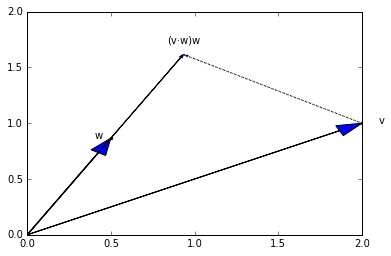

In [23]:
import math
import matplotlib.pyplot as plt

v = [2,1]
w = [math.sqrt(.25), math.sqrt(.75)]
c = vector_dot(v,w)
vonw = scalar_multiply(c, w)
o = [0,0]

plt.arrow(0,0, v[0], v[1], width=0.002, head_width=.1, length_includes_head=True)
plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])

plt.arrow(0,0, w[0],w[1], width=0.002, head_width=.1, length_includes_head=True)
plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])

plt.arrow(0,0, vonw[0],vonw[1], length_includes_head=True)
plt.annotate("(v·w)w", vonw, xytext=[vonw[0]-0.1, vonw[1]+0.1])

plt.arrow(v[0],v[1], vonw[0]-v[0], vonw[1]-v[1], linestyle='dotted', length_includes_head=True)

plt.scatter(*zip(v,w,o), marker='.')

plt.axis([0,2,0,2])
plt.show()

위 그림을 보면 `v·w`의 내적한 값에 `w`를 곱해주니 `w`방향으로 `v`의 크기만큼을 투영한 벡터나 나옵니다.

### 1.7 vector의 크기

모든 성분들을 제곱한 값을 더한 뒤 제곱근을 구하면 됩니다.
자기자신과의 내적값에 제곱근을 하는 것으로 쉽게 구할 수 있습니다.

In [23]:
import math

def magnitude(v):
    return math.sqrt(vector_dot(v,v))

In [24]:
magnitude(a)

2.23606797749979

### 1.8 vector의 거리

두 벡터간의 거리를 구하는 것은 각 성분들을 뺀값을 제곱한 다음에 제곱근을 취해주면 됩니다.

In [29]:
def distance(v, w):
    return math.sqrt(vector_dot(vector_subtract(v,w), vector_subtract(v,w)))

In [30]:
distance(a, b)

1.4142135623730951

두 백터의 뺄셈의 크기를 구하는것과도 같습니다.

In [31]:
def distance(v, w):
    return magnitude(vector_subtract(v,w))

In [32]:
distance(a, b)

1.4142135623730951

### 2. 행렬 (matrix)

행렬은 2차원으로 구성된 숫자의 집합이며, `list`의 `list`로 구성이 가능합니다.

In [1]:
A = [[1, 2, 3],
     [4, 5, 6]]

B = [[1, 2],
     [3, 4],
     [5, 6]]

행렬을 만들어주는 함수를 정의해 보겠습니다.

In [2]:
def make_matrix(num_rows, num_cols, entry_fn):
    return [[entry_fn(i, j)
             for j in range(num_cols)]
             for i in range(num_rows)]

* `단위행렬(diagnoal matrix)` : 대각선의 원소는 1이고 나머지는 0인 행렬

In [3]:
def is_dignoal(i, j):
    return 1 if i == j else 0

In [4]:
identity_matrix = make_matrix(5, 5, is_dignoal)

identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

1장에서 네트워크를 표현한 것을 행렬을 표현하는 것이 가능합니다.

In [6]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [7]:
#          user 0  1  2  3  4  5  6  7  8  9
#
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

이 경우 친구관계를 index로 확인이 가능합니다.

In [9]:
friendships[0][2]

1

In [10]:
friendships[0][8]

0